<a href="https://colab.research.google.com/github/anmolsabharwal/RedDevils/blob/master/RD_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
 
 
drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
gws = sqlite3.connect('/content/drive/My Drive/FPL1.db')
gws = pd.read_sql_query("SELECT * FROM gw",gws)
gws

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,value
0,Aaron Cresswell,0,1,0,0,0,0,0,0,0,0,14023,55
1,Aaron Lennon,1,1,0.9,0,6,0,0,8.2,15,0,13918,60
2,Aaron Ramsey,2,1,3,0,5,0,0,2.2,60,23,163170,80
3,Abdoulaye DoucourÈ,0,1,0,0,0,0,0,0,0,0,1051,50
4,Abdul Rahman Baba,0,1,0,0,0,0,0,0,0,0,1243,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83800,Lukas Rupp,1,142,1.9,0,7,0,0,8.2,22,0,725,45
83801,Jack Simpson,0,142,0,0,0,0,0,0,0,0,515310,40
83802,Miguel Almir√≥n,3,142,13.6,0,8,0,0,19.8,90,63,56476,58
83803,Luka Milivojevic,0,142,0,0,0,0,0,0,0,0,141051,67


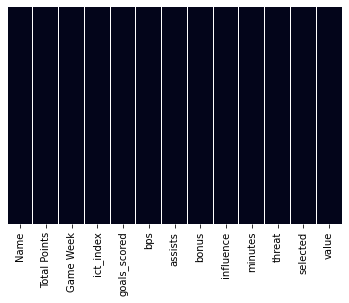

In [81]:
sns.heatmap(gws.isnull(),yticklabels=False,cbar=False)

In [82]:
gws=gws.astype({'Total Points':int,'Game Week':int,'ict_index':float,'goals_scored':int,'bps':float,'assists':int,'bonus':int,'influence':float,'minutes':int,'threat':float,'selected':int,'value':int})

In [83]:
gws = gws.assign(id=(gws['Name']).astype('category').cat.codes)


In [84]:
gws.head(50)

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,value,id
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,55,1
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,60,2
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,80,5
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,50,10
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,55,12
5,Abel Hern·ndez,5,1,5.7,0,10.0,1,0,14.4,90,30.0,26039,60,13
6,Adama Diomande,8,1,10.7,1,29.0,0,2,45.2,90,45.0,38151,45,28
7,Adam Clayton,2,1,1.4,0,6.0,0,0,3.2,90,9.0,17663,45,16
8,Adam Federici,0,1,0.0,0,0.0,0,0,0.0,0,0.0,4315,45,17
9,Adam Forshaw,1,1,0.3,0,3.0,0,0,2.0,69,0.0,2723,45,18


In [85]:
gws1=gws.copy()

In [86]:
gws.columns


Index(['Name', 'Total Points', 'Game Week', 'ict_index', 'goals_scored', 'bps',
       'assists', 'bonus', 'influence', 'minutes', 'threat', 'selected',
       'value', 'id'],
      dtype='object')

In [87]:
#gws1['Total Points'].plot(kind='bar')

In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#x = gws1[['Total Points']].values.astype(float)
#scale = MinMaxScaler(feature_range=(0, 1) )

#scalerX = MinMaxScaler()
#scalery = MinMaxScaler()


#x_scaled = scale.fit(x)
#x_scaled=scale.transform(x)
#y = pd.DataFrame(x_scaled)


In [89]:
#gws1['Points']=y
gws1.head()


,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,value,id
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,55,1
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,60,2
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,80,5
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,50,10
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,55,12


In [90]:
gws1['Last_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift()
#gws1['Last_2_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(2)
#gws1['Last_3_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(3)
# gws1['Last_4_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(4)
# gws1['Last_5_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(5)
# gws1['Last_6_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(6)
# gws1['Last_7_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(7)
# gws1['Last_8_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(8)



gws1['Last_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift()
#gws1['Last_2_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(2)
#gws1['Last_3_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(3)
# gws1['Last_4_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(4)
# gws1['Last_5_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(5)
# gws1['Last_6_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(6)
# gws1['Last_7_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(7)
# gws1['Last_8_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(8)


gws1['Last_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift()
#gws1['Last_2_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(2)
#gws1['Last_3_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(3)
# gws1['Last_4_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(4)
# gws1['Last_5_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(5)
# gws1['Last_6_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(6)
# gws1['Last_7_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(7)
# gws1['Last_8_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(8)


gws1['Last_Week_BPS'] = gws1.groupby(['id'])['bps'].shift()
#gws1['Last_2_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(2)
#gws1['Last_3_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(3)
# gws1['Last_4_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(4)
# gws1['Last_5_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(5)
# gws1['Last_6_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(6)
# gws1['Last_7_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(7)
# gws1['Last_8_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(8)



gws1['Last_Week_Assists'] = gws1.groupby(['id'])['assists'].shift()
#gws1['Last_2_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(2)
#gws1['Last_3_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(3)
# gws1['Last_4_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(4)
# gws1['Last_5_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(5)
# gws1['Last_6_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(6)
# gws1['Last_7_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(7)
# gws1['Last_8_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(8)



gws1['Last_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift()
#gws1['Last_2_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(2)
#gws1['Last_3_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(3)
# gws1['Last_4_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(4)
# gws1['Last_5_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(5)
# gws1['Last_6_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(6)
# gws1['Last_7_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(7)
# gws1['Last_8_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(8)



gws1['Last_Week_Influence'] = gws1.groupby(['id'])['influence'].shift()
#gws1['Last_2_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(2)
#gws1['Last_3_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(3)
# gws1['Last_4_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(4)
# gws1['Last_5_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(5)
# gws1['Last_6_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(6)
# gws1['Last_7_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(7)
# gws1['Last_8_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(8)



gws1['Last_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift()
#gws1['Last_2_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(2)
#gws1['Last_3_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(3)
# gws1['Last_4_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(4)
# gws1['Last_5_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(5)
# gws1['Last_6_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(6)
# gws1['Last_7_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(7)
# gws1['Last_8_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(8)



gws1['Last_Week_Threat'] = gws1.groupby(['id'])['threat'].shift()
#gws1['Last_2_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(2)
#gws1['Last_3_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(3)
# gws1['Last_4_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(4)
# gws1['Last_5_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(5)
# gws1['Last_6_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(6)
# gws1['Last_7_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(7)
# gws1['Last_8_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(8)


gws1['Last_Week_Selected'] = gws1.groupby(['id'])['selected'].shift()
#gws1['Last_2_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(2)
#gws1['Last_3_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(3)
# gws1['Last_4_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(4)
# gws1['Last_5_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(5)
# gws1['Last_6_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(6)
# gws1['Last_7_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(7)
# gws1['Last_8_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(8)


gws1['Last_Week_Value'] = gws1.groupby(['id'])['value'].shift()
#gws1['Last_2_Week_Value'] = gws1.groupby(['id'])['value'].shift(2)
#gws1['Last_3_Week_Value'] = gws1.groupby(['id'])['value'].shift(3)
# gws1['Last_4_Week_Value'] = gws1.groupby(['id'])['value'].shift(4)
# gws1['Last_5_Week_Value'] = gws1.groupby(['id'])['value'].shift(5)
# gws1['Last_6_Week_Value'] = gws1.groupby(['id'])['value'].shift(6)
# gws1['Last_7_Week_Value'] = gws1.groupby(['id'])['value'].shift(7)
# gws1['Last_8_Week_Value'] = gws1.groupby(['id'])['value'].shift(8)



gws1.head(900)

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,value,id,Last_Week_Points,Last_Week_Goals,Last_Week_ICT,Last_Week_BPS,Last_Week_Assists,Last_Week_Bonus,Last_Week_Influence,Last_Week_Minutes_Played,Last_Week_Threat,Last_Week_Selected,Last_Week_Value
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,55,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,60,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,80,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,50,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,55,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Maarten Stekelenburg,0,2,0.0,0,0.0,0,0,0.0,0,0.0,203625,51,834,3.0,0.0,2.2,15.0,0.0,0.0,21.8,90.0,0.0,31420.0,50.0
896,Maksymilian Stryjek,0,2,0.0,0,0.0,0,0,0.0,0,0.0,2692,40,837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897,Mamadou Obbi OularÈ,0,2,0.0,0,0.0,0,0,0.0,0,0.0,469,45,838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,574.0,45.0
898,Mamadou Sakho,0,2,0.0,0,0.0,0,0,0.0,0,0.0,3686,47,839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3971.0,50.0


In [91]:
gws1['Last_Week_Diff_Points'] = gws1.groupby(['id'])['Last_Week_Points'].diff()
#gws1['Last_2_Week_Diff_Points'] = gws1.groupby(['id'])['Last_2_Week_Points'].diff()
#gws1['Last_3_Week_Diff_Points'] = gws1.groupby(['id'])['Last_3_Week_Points'].diff()
#gws1['Last_4_Week_Diff_Points'] = gws1.groupby(['id'])['Last_4_Week_Points'].diff()
#gws1['Last_5_Week_Diff_Points'] = gws1.groupby(['id'])['Last_5_Week_Points'].diff()
# gws1['Last_6_Week_Diff_Points'] = gws1.groupby(['id'])['Last_6_Week_Points'].diff()
# gws1['Last_7_Week_Diff_Points'] = gws1.groupby(['id'])['Last_7_Week_Points'].diff()
# gws1['Last_8_Week_Diff_Points'] = gws1.groupby(['id'])['Last_8_Week_Points'].diff()




gws1['Last_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_Week_Goals'].diff()
#gws1['Last_2_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_2_Week_Goals'].diff()
#gws1['Last_3_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_3_Week_Goals'].diff()
# gws1['Last_4_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_4_Week_Goals'].diff()
# gws1['Last_5_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_5_Week_Goals'].diff()
# gws1['Last_6_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_6_Week_Goals'].diff()
# gws1['Last_7_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_7_Week_Goals'].diff()
# gws1['Last_8_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_8_Week_Goals'].diff()


gws1['Last_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_Week_BPS'].diff()
#gws1['Last_2_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_2_Week_BPS'].diff()
#gws1['Last_3_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_3_Week_BPS'].diff()
# gws1['Last_4_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_4_Week_BPS'].diff()
# gws1['Last_5_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_5_Week_BPS'].diff()
# gws1['Last_6_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_6_Week_BPS'].diff()
# gws1['Last_7_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_7_Week_BPS'].diff()
# gws1['Last_8_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_8_Week_BPS'].diff()


gws1['Last_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_Week_ICT'].diff()
#gws1['Last_2_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_2_Week_ICT'].diff()
#gws1['Last_3_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_3_Week_ICT'].diff()
# gws1['Last_4_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_4_Week_ICT'].diff()
# gws1['Last_5_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_5_Week_ICT'].diff()
# gws1['Last_6_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_6_Week_ICT'].diff()
# gws1['Last_7_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_7_Week_ICT'].diff()
# gws1['Last_8_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_8_Week_ICT'].diff()



gws1['Last_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_Week_Assists'].diff()
#gws1['Last_2_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_2_Week_Assists'].diff()
#gws1['Last_3_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_3_Week_Assists'].diff()
# gws1['Last_4_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_4_Week_Assists'].diff()
# gws1['Last_5_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_5_Week_Assists'].diff()
# gws1['Last_6_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_6_Week_Assists'].diff()
# gws1['Last_7_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_7_Week_Assists'].diff()
# gws1['Last_8_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_8_Week_Assists'].diff()



gws1['Last_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_Week_Bonus'].diff()
#gws1['Last_2_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_2_Week_Bonus'].diff()
#gws1['Last_3_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_3_Week_Bonus'].diff()
# gws1['Last_4_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_4_Week_Bonus'].diff()
# gws1['Last_5_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_5_Week_Bonus'].diff()
# gws1['Last_6_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_6_Week_Bonus'].diff()
# gws1['Last_7_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_7_Week_Bonus'].diff()
# gws1['Last_8_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_8_Week_Bonus'].diff()


gws1['Last_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_Week_Influence'].diff()
#gws1['Last_2_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_2_Week_Influence'].diff()
#gws1['Last_3_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_3_Week_Influence'].diff()
# gws1['Last_4_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_4_Week_Influence'].diff()
# gws1['Last_5_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_5_Week_Influence'].diff()
# gws1['Last_6_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_6_Week_Influence'].diff()
# gws1['Last_7_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_7_Week_Influence'].diff()
# gws1['Last_8_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_8_Week_Influence'].diff()



gws1['Last_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_Week_Threat'].diff()
#gws1['Last_2_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_2_Week_Threat'].diff()
#gws1['Last_3_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_3_Week_Threat'].diff()
# gws1['Last_4_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_4_Week_Threat'].diff()
# gws1['Last_5_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_5_Week_Threat'].diff()
# gws1['Last_6_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_6_Week_Threat'].diff()
# gws1['Last_7_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_7_Week_Threat'].diff()
# gws1['Last_8_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_8_Week_Threat'].diff()


gws1['Last_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_Week_Selected'].diff()
#gws1['Last_2_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_2_Week_Selected'].diff()
#gws1['Last_3_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_3_Week_Selected'].diff()
# gws1['Last_4_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_4_Week_Selected'].diff()
# gws1['Last_5_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_5_Week_Selected'].diff()
# gws1['Last_6_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_6_Week_Selected'].diff()
# gws1['Last_7_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_7_Week_Selected'].diff()
# gws1['Last_8_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_8_Week_Selected'].diff()

gws1['Last_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_Week_Minutes_Played'].diff()
#gws1['Last_2_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_2_Week_Minutes_Played'].diff()
#gws1['Last_3_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_3_Week_Minutes_Played'].diff()
# gws1['Last_4_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_4_Week_Minutes_Played'].diff()
# gws1['Last_5_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_5_Week_Minutes_Played'].diff()
# gws1['Last_6_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_6_Week_Minutes_Played'].diff()
# gws1['Last_7_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_7_Week_Minutes_Played'].diff()
# gws1['Last_8_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_8_Week_Minutes_Played'].diff()

gws1['Last_Week_Diff_Value'] = gws1.groupby(['id'])['Last_Week_Value'].diff()
#gws1['Last_2_Week_Diff_Value'] = gws1.groupby(['id'])['Last_2_Week_Value'].diff()
#gws1['Last_3_Week_Diff_Value'] = gws1.groupby(['id'])['Last_3_Week_Value'].diff()
# gws1['Last_4_Week_Diff_Value'] = gws1.groupby(['id'])['Last_4_Week_Value'].diff()
# gws1['Last_5_Week_Diff_Value'] = gws1.groupby(['id'])['Last_5_Week_Value'].diff()
# gws1['Last_6_Week_Diff_Value'] = gws1.groupby(['id'])['Last_6_Week_Value'].diff()
# gws1['Last_7_Week_Diff_Value'] = gws1.groupby(['id'])['Last_7_Week_Value'].diff()
# gws1['Last_8_Week_Diff_Value'] = gws1.groupby(['id'])['Last_8_Week_Value'].diff()

In [92]:
#gws1['rolling_mean'] = gws1['Total Points'].rolling(window=7).mean()
gws1['Rolling Mean Points'] = gws1['Total Points'].expanding().mean().shift(1)
#gws1['Rolling Mean Points 1']=gws1['Last_Week_Points'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Points 3']=gws1['Last_2_Week_Points'].rolling(window=2).mean()
# gws1['Rolling Mean Points 4']=gws1['Last_3_Week_Points'].expanding(window=2).mean()

#gws1['Rolling Mean Points diff 1'] = gws1['Last_Week_Diff_Points'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Points diff 3'] = gws1['Last_2_Week_Diff_Points'].rolling(window=2).mean()
# gws1['Rolling Mean Points diff 4'] = gws1['Last_3_Week_Diff_Points'].rolling(window=2).mean()


gws1['Rolling Mean Goals'] = gws1['goals_scored'].expanding().mean().shift(1)
#gws1['Rolling Mean Goals 1'] = gws1['Last_Week_Goals'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Goals 3'] = gws1['Last_2_Week_Goals'].expanding(window=2).mean()
# gws1['Rolling Mean Goals 4'] = gws1['Last_3_Week_Goals'].rolling(window=2).mean()


#gws1['Rolling Mean Goals diff 1'] = gws1['Last_Week_Diff_Goals'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Goals diff 3'] = gws1['Last_2_Week_Diff_Goals'].rolling(window=2).mean()
# gws1['Rolling Mean Goals diff 4'] = gws1['Last_3_Week_Goals'].rolling(window=2).mean()





gws1['Rolling Mean ICT'] = gws1['ict_index'].expanding().mean().shift(1)
#gws1['Rolling Mean ICT Index 1'] = gws1['Last_Week_ICT'].expanding(10).mean().shift(1)
#gws1['Rolling Mean ICT Index 3'] = gws1['Last_2_Week_ICT'].rolling(window=2).mean()
# gws1['Rolling Mean ICT Index 4'] = gws1['Last_3_Week_ICT'].rolling(window=2).mean()


#gws1['Rolling Mean ICT Index Diff 1'] = gws1['Last_Week_Diff_ICT'].expanding(10).mean().shift(1)
#gws1['Rolling Mean ICT Index diff 3'] = gws1['Last_2_Week_Diff_ICT'].rolling(window=2).mean()
# gws1['Rolling Mean ICT Index diff 4'] = gws1['Last_3_Week_Diff_ICT'].rolling(window=2).mean()


gws1['Rolling Mean Influence'] = gws1['influence'].expanding().mean().shift(1)
#gws1['Rolling Mean Influence 1'] = gws1['Last_Week_Influence'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Influence 3'] = gws1['Last_2_Week_Influence'].rolling(window=2).mean()
# gws1['Rolling Mean Influence 4'] = gws1['Last_3_Week_Influence'].rolling(window=2).mean()


#gws1['Rolling Mean Influence Diff 1'] = gws1['Last_Week_Diff_Influence'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Influence diff 3'] = gws1['Last_2_Week_Diff_Influence'].rolling(window=2).mean()
# gws1['Rolling Mean Influence diff 4'] = gws1['Last_3_Week_Diff_Influence'].rolling(window=2).mean()


gws1['Rolling Mean Threat'] = gws1['threat'].expanding().mean().shift(1)
#gws1['Rolling Mean Threat 1'] = gws1['Last_Week_Threat'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Threat 3'] = gws1['Last_2_Week_Threat'].rolling(window=2).mean()
# gws1['Rolling Mean Threat 4'] = gws1['Last_3_Week_Threat'].rolling(window=2).mean()


#gws1['Rolling Mean Threat Diff 1'] = gws1['Last_Week_Diff_Threat'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Threat diff 3'] = gws1['Last_2_Week_Diff_Threat'].rolling(window=2).mean()
# gws1['Rolling Mean Threat diff 4'] = gws1['Last_3_Week_Diff_Threat'].rolling(window=2).mean()


gws1['Rolling Mean BPS'] = gws1['bps'].expanding().mean().shift(1)
#gws1['Rolling Mean BPS 1'] = gws1['Last_Week_BPS'].expanding(10).mean().shift(1)
#gws1['Rolling Mean BPS 3'] = gws1['Last_2_Week_BPS'].rolling(window=2).mean()
# gws1['Rolling Mean BPS 4'] = gws1['Last_3_Week_BPS'].rolling(window=2).mean()


#gws1['Rolling Mean BPS Diff 1'] = gws1['Last_Week_Diff_BPS'].expanding(10).mean().shift(1)
#gws1['Rolling Mean BPS diff 3'] = gws1['Last_2_Week_Diff_BPS'].rolling(window=2).mean()
# gws1['Rolling Mean BPS diff 4'] = gws1['Last_3_Week_Diff_BPS'].rolling(window=2).mean()


gws1['Rolling Mean Bonus'] = gws1['bonus'].expanding().mean().shift(1)
#gws1['Rolling Mean Bonus 1'] = gws1['Last_Week_Bonus'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Bonus 3'] = gws1['Last_2_Week_Bonus'].rolling(window=2).mean()
# gws1['Rolling Mean Bonus 4'] = gws1['Last_3_Week_Bonus'].rolling(window=2).mean()


#gws1['Rolling Mean Bonus Diff 1'] = gws1['Last_Week_Diff_Bonus'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Bonus diff 3'] = gws1['Last_2_Week_Diff_Bonus'].rolling(window=2).mean()
# gws1['Rolling Mean Bonus diff 4'] = gws1['Last_3_Week_Diff_Bonus'].rolling(window=2).mean()


gws1['Rolling Mean Assists'] = gws1['assists'].expanding().mean().shift(1)
#gws1['Rolling Mean Assists 1'] = gws1['Last_Week_Assists'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Assists 3'] = gws1['Last_2_Week_Assists'].rolling(window=2).mean()
# gws1['Rolling Mean Assists 3'] = gws1['Last_3_Week_Assists'].rolling(window=2).mean()


#gws1['Rolling Mean Assists Diff 1'] = gws1['Last_Week_Diff_Assists'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Assists diff 3'] = gws1['Last_2_Week_Diff_Assists'].rolling(window=2).mean()
# gws1['Rolling Mean Assists diff 4'] = gws1['Last_3_Week_Diff_Assists'].rolling(window=2).mean()


gws1['Rolling Mean Minutes_Played'] = gws1['minutes'].expanding().mean().shift(1)
#gws1['Rolling Mean Minutes_Played 1'] = gws1['Last_Week_Minutes_Played'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Minutes_Played 3'] = gws1['Last_2_Week_Minutes_Played'].rolling(window=2).mean()
# gws1['Rolling Mean Minutes_Played 4'] = gws1['Last_3_Week_Minutes_Played'].rolling(window=2).mean()


#gws1['Rolling Mean Minutes_Played Diff 1'] = gws1['Last_Week_Diff_Minutes_Played'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Minutes_Played diff 3'] = gws1['Last_2_Week_Diff_Minutes_Played'].rolling(window=2).mean()
# gws1['Rolling Mean Minutes_Played diff 4'] = gws1['Last_3_Week_Diff_Minutes_Played'].rolling(window=2).mean()



gws1['Rolling Mean Selected'] = gws1['selected'].expanding().mean().shift(1)
#gws1['Rolling Mean Selected 1'] = gws1['Last_Week_Selected'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Selected 3'] = gws1['Last_2_Week_Selected'].rolling(window=2).mean()
# gws1['Rolling Mean Selected 4'] = gws1['Last_3_Week_Selected'].rolling(window=2).mean()


#gws1['Rolling Mean Selected Diff 1'] = gws1['Last_Week_Diff_Selected'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Selected diff 3'] = gws1['Last_2_Week_Diff_Selected'].rolling(window=2).mean()
# gws1['Rolling Mean Selected diff 4'] = gws1['Last_3_Week_Diff_Selected'].rolling(window=2).mean()

gws1['Rolling Mean Value'] = gws1['value'].expanding().mean().shift(1)
#gws1['Rolling Mean Value 1'] = gws1['Last_Week_Value'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Value 3'] = gws1['Last_2_Week_Value'].rolling(window=2).mean()
# gws1['Rolling Mean Value 4'] = gws1['Last_3_Week_Value'].rolling(window=2).mean()

#gws1['Rolling Mean Value Diff 1'] = gws1['Last_Week_Diff_Value'].expanding(10).mean().shift(1)
#gws1['Rolling Mean Value diff 3'] = gws1['Last_2_Week_Diff_Value'].rolling(window=2).mean()
# gws1['Rolling Mean Value diff 4'] = gws1['Last_3_Week_Diff_Value'].rolling(window=2).mean()

#gws1.drop(['ROlling Mean Point Diff'],axis=1,inplace=True)

gws1.head(700)

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,value,id,Last_Week_Points,Last_Week_Goals,Last_Week_ICT,Last_Week_BPS,Last_Week_Assists,Last_Week_Bonus,Last_Week_Influence,Last_Week_Minutes_Played,Last_Week_Threat,Last_Week_Selected,Last_Week_Value,Last_Week_Diff_Points,Last_Week_Diff_Goals,Last_Week_Diff_BPS,Last_Week_Diff_ICT,Last_Week_Diff_Assists,Last_Week_Diff_Bonus,Last_Week_Diff_Influence,Last_Week_Diff_Threat,Last_Week_Diff_Selected,Last_Week_Diff_Minutes_Played,Last_Week_Diff_Value,Rolling Mean Points,Rolling Mean Goals,Rolling Mean ICT,Rolling Mean Influence,Rolling Mean Threat,Rolling Mean BPS,Rolling Mean Bonus,Rolling Mean Assists,Rolling Mean Minutes_Played,Rolling Mean Selected,Rolling Mean Value
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,55,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,60,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14023.000000,55.000000
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,80,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.000000,0.450000,4.100000,0.000000,3.000000,0.000000,0.000000,7.500000,13970.500000,57.500000
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,50,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.300000,3.466667,7.666667,3.666667,0.000000,0.000000,25.000000,63703.666667,65.000000
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,55,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,0.000000,0.975000,2.600000,5.750000,2.750000,0.000000,0.000000,18.750000,48040.500000,61.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Dusan Tadic,2,2,4.1,0,6.0,0,0,6.6,77,23.0,98813,72,373,2.0,0.0,18.1,17.0,0.0,0.0,32.8,90.0,54.0,192865.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.348201,0.046043,1.869928,7.614388,5.743885,6.457554,0.109353,0.038849,36.709353,90358.352518,53.388489
696,Eden Hazard,14,2,18.0,1,42.0,1,3,67.8,90,49.0,772644,98,376,10.0,1.0,9.2,33.0,0.0,3.0,44.2,84.0,24.0,571173.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.349138,0.045977,1.873132,7.612931,5.768678,6.456897,0.109195,0.038793,36.767241,90370.500000,53.415230
697,Edimilson Fernandes,2,2,1.2,0,5.0,0,0,1.4,70,8.0,516,49,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.367288,0.047346,1.896270,7.699283,5.830703,6.507891,0.113343,0.040172,36.843615,91349.371593,53.479197
698,Eldin Jakupovic,0,2,0.0,0,0.0,0,0,0.0,0,0.0,846260,41,382,3.0,0.0,2.5,16.0,0.0,0.0,25.2,90.0,0.0,451193.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.368195,0.047278,1.895272,7.690258,5.833811,6.505731,0.113181,0.040115,36.891117,91219.237822,53.472779


In [93]:
gws1=gws1.dropna()
#gws1.drop('Total Points',axis=1, inplace=True)


In [94]:
from sklearn.model_selection import TimeSeriesSplit
# n-splits determine the number folds. N-1 in this case we split our # data into two sets. (3-1)
tss = TimeSeriesSplit(n_splits = 3)
X=gws1.drop(['Name','Total Points','ict_index','goals_scored','bps','assists','bonus','influence','minutes','threat','value','selected'],axis=1)
y=gws1['Total Points']
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [95]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
#X=gws1.drop(['Name','Total Points','ict_index','goals_scored','bps','assists','bonus','influence','minutes','threat','value','selected'],axis=1)
#X=gws1.drop(['Name','Total Points','influence','bps','bonus','ict_index'],axis=1)
#y=gws1['Total Points']
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [96]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
#model=RandomForestRegressor()
#model=GradientBoostingRegressor()
#model=Lasso()
model=Ridge()
#model=LinearRegression()
k_fold = KFold(n_splits=2)
for train_indices, test_indices in k_fold.split(X):
  print('Train: %s | test: %s' % (train_indices, test_indices))
 
[model.fit(X_train, y_train).score(X_test, y_test)
for train, test in k_fold.split(X)]

Train: [40584 40585 40586 ... 81164 81165 81166] | test: [    0     1     2 ... 40581 40582 40583]
Train: [    0     1     2 ... 40581 40582 40583] | test: [40584 40585 40586 ... 81164 81165 81166]


[0.2630209000423509, 0.2630209000423509]

ValueError: ignored

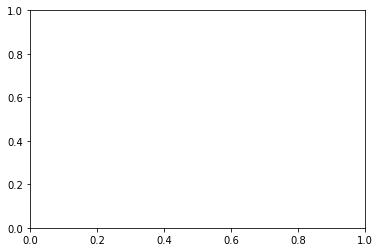

In [97]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(gws1.drop('Name',axis=1), lags=50)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from scipy.stats import randint as sp_randint


param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, X_train.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],"n_estimators": sp_randint(100, 500)}
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=10, cv=5, iid=False, random_state=42)
random_search.fit(X_train, y_train)
print(random_search.best_params_)


In [ ]:
predict = random_search.predict(X_test)
print(explained_variance_score(y_test, predict))

In [ ]:
 score=cross_val_score(model, X, y, cv=k_fold,scoring='r2')
score.mean()

In [ ]:
predict=model.predict(X_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':predict,'Error':abs(predict-y_test)})
df.head(50)

In [ ]:
df['Error'].mean()

In [ ]:
sns.scatterplot(y_test,predict)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score,classification_report
print('MAE:',mean_absolute_error(y_test,predict))
print('MSE:',mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(mean_squared_error(y_test,predict)))
print('R2 Score',r2_score(y_test,predict))


In [ ]:
sns.distplot(y_test-predict,color='purple',kde=True)

In [ ]:
#plt.figure(figsize=(50,15))
#gws1.groupby(['Name'])['Total Points'].plot().head(30)

In [ ]:
test=pd.read_csv("/content/drive/My Drive/test3.csv")

In [ ]:
test = test.assign(id=(test['Name']).astype('category').cat.codes)


In [ ]:
test=test.astype({'Game Week':int,'ict_index':float,'goals_scored':int,'bps':float,'assists':int,'bonus':int,'influence':float,'minutes':int,'threat':float,'selected':int,'value':int})

In [ ]:
test['Last_Week_Points'] = test.groupby(['Name'])['total_points'].shift()
test['Last_2_Week_Points'] = test.groupby(['Name'])['total_points'].shift(2)
# gws1['Last_3_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(3)
# gws1['Last_4_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(4)
# gws1['Last_5_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(5)
# gws1['Last_6_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(6)
# gws1['Last_7_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(7)
# gws1['Last_8_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(7)



test['Last_Week_Goals'] = test.groupby(['Name'])['goals_scored'].shift()
test['Last_2_Week_Goals'] = test.groupby(['Name'])['goals_scored'].shift(2)
# gws1['Last_3_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(3)
# gws1['Last_4_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(4)
# gws1['Last_5_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(5)
# gws1['Last_6_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(6)
# gws1['Last_7_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(7)
# gws1['Last_8_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(7)


test['Last_Week_ICT'] = test.groupby(['Name'])['ict_index'].shift()
test['Last_2_Week_ICT'] = test.groupby(['Name'])['ict_index'].shift(2)
# gws1['Last_3_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(3)
# gws1['Last_4_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(4)
# gws1['Last_5_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(5)
# gws1['Last_6_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(6)
# gws1['Last_7_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(7)
# gws1['Last_8_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(7)


test['Last_Week_BPS'] = test.groupby(['Name'])['bps'].shift()
test['Last_2_Week_BPS'] = test.groupby(['Name'])['bps'].shift(2)
# gws1['Last_3_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(3)
# gws1['Last_4_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(4)
# gws1['Last_5_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(5)
# gws1['Last_6_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(6)
# gws1['Last_7_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(7)
# gws1['Last_8_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(7)



test['Last_Week_Assists'] = test.groupby(['Name'])['assists'].shift()
test['Last_2_Week_Assists'] = test.groupby(['Name'])['assists'].shift(2)
# gws1['Last_3_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(3)
# gws1['Last_4_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(4)
# gws1['Last_5_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(5)
# gws1['Last_6_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(6)
# gws1['Last_7_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(7)
# gws1['Last_8_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(7)



test['Last_Week_Bonus'] = test.groupby(['Name'])['bonus'].shift()
test['Last_2_Week_Bonus'] = test.groupby(['Name'])['bonus'].shift(2)
# gws1['Last_3_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(3)
# gws1['Last_4_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(4)
# gws1['Last_5_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(5)
# gws1['Last_6_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(6)
# gws1['Last_7_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(7)
# gws1['Last_8_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(7)



test['Last_Week_Influence'] = test.groupby(['Name'])['influence'].shift()
test['Last_2_Week_Influence'] = test.groupby(['Name'])['influence'].shift(2)
# gws1['Last_3_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(3)
# gws1['Last_4_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(4)
# gws1['Last_5_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(5)
# gws1['Last_6_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(6)
# gws1['Last_7_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(7)
# gws1['Last_8_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(7)



test['Last_Week_Minutes_Played'] = test.groupby(['Name'])['minutes'].shift()
test['Last_2_Week_Minutes_Played'] = test.groupby(['Name'])['minutes'].shift(2)
# gws1['Last_3_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(3)
# gws1['Last_4_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(4)
# gws1['Last_5_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(5)
# gws1['Last_6_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(6)
# gws1['Last_7_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(7)
# gws1['Last_8_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(7)



test['Last_Week_Threat'] = test.groupby(['Name'])['threat'].shift()
test['Last_2_Week_Threat'] = test.groupby(['Name'])['threat'].shift(2)
# gws1['Last_3_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(3)
# gws1['Last_4_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(4)
# gws1['Last_5_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(5)
# gws1['Last_6_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(6)
# gws1['Last_7_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(7)
# gws1['Last_8_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(7)


test['Last_Week_Selected'] = test.groupby(['Name'])['selected'].shift()
test['Last_2_Week_Selected'] = test.groupby(['Name'])['selected'].shift(2)
# gws1['Last_3_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(3)
# gws1['Last_4_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(4)
# gws1['Last_5_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(5)
# gws1['Last_6_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(6)
# gws1['Last_7_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(7)
# gws1['Last_8_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(7)


test['Last_Week_Value'] = test.groupby(['Name'])['value'].shift()
test['Last_2_Week_Value'] = test.groupby(['Name'])['value'].shift(2)
# gws1['Last_3_Week_Value'] = gws1.groupby(['id'])['value'].shift(3)
# gws1['Last_4_Week_Value'] = gws1.groupby(['id'])['value'].shift(4)
# gws1['Last_5_Week_Value'] = gws1.groupby(['id'])['value'].shift(5)
# gws1['Last_6_Week_Value'] = gws1.groupby(['id'])['value'].shift(6)
# gws1['Last_7_Week_Value'] = gws1.groupby(['id'])['value'].shift(7)
# gws1['Last_8_Week_Value'] = gws1.groupby(['id'])['value'].shift(7)



test.head()

In [ ]:
test['Last_Week_Diff_Points'] = test.groupby(['Name'])['Last_Week_Points'].diff()
test['Last_2_Week_Diff_Points'] = test.groupby(['Name'])['Last_2_Week_Points'].diff()
# gws1['Last_3_Week_Diff_Points'] = gws1.groupby(['id'])['Last_3_Week_Points'].diff()
# gws1['Last_4_Week_Diff_Points'] = gws1.groupby(['id'])['Last_4_Week_Points'].diff()
# gws1['Last_5_Week_Diff_Points'] = gws1.groupby(['id'])['Last_5_Week_Points'].diff()
# gws1['Last_6_Week_Diff_Points'] = gws1.groupby(['id'])['Last_6_Week_Points'].diff()
# gws1['Last_7_Week_Diff_Points'] = gws1.groupby(['id'])['Last_7_Week_Points'].diff()
# gws1['Last_8_Week_Diff_Points'] = gws1.groupby(['id'])['Last_8_Week_Points'].diff()




test['Last_Week_Diff_Goals'] = test.groupby(['Name'])['Last_Week_Goals'].diff()
test['Last_2_Week_Diff_Goals'] = test.groupby(['Name'])['Last_2_Week_Goals'].diff()
# gws1['Last_3_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_3_Week_Goals'].diff()
# gws1['Last_4_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_4_Week_Goals'].diff()
# gws1['Last_5_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_5_Week_Goals'].diff()
# gws1['Last_6_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_6_Week_Goals'].diff()
# gws1['Last_7_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_7_Week_Goals'].diff()
# gws1['Last_8_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_8_Week_Goals'].diff()


test['Last_Week_Diff_BPS'] = test.groupby(['Name'])['Last_Week_BPS'].diff()
test['Last_2_Week_Diff_BPS'] = test.groupby(['Name'])['Last_2_Week_BPS'].diff()
# gws1['Last_3_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_3_Week_BPS'].diff()
# gws1['Last_4_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_4_Week_BPS'].diff()
# gws1['Last_5_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_5_Week_BPS'].diff()
# gws1['Last_6_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_6_Week_BPS'].diff()
# gws1['Last_7_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_7_Week_BPS'].diff()
# gws1['Last_8_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_8_Week_BPS'].diff()


test['Last_Week_Diff_ICT'] = test.groupby(['Name'])['Last_Week_ICT'].diff()
test['Last_2_Week_Diff_ICT'] = test.groupby(['Name'])['Last_2_Week_ICT'].diff()
# gws1['Last_3_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_3_Week_ICT'].diff()
# gws1['Last_Week_4_Diff_ICT'] = gws1.groupby(['id'])['Last_4_Week_ICT'].diff()
# gws1['Last_Week_5_Diff_ICT'] = gws1.groupby(['id'])['Last_5_Week_ICT'].diff()
# gws1['Last_Week_6_Diff_ICT'] = gws1.groupby(['id'])['Last_6_Week_ICT'].diff()
# gws1['Last_Week_7_Diff_ICT'] = gws1.groupby(['id'])['Last_7_Week_ICT'].diff()
# gws1['Last_Week_8_Diff_ICT'] = gws1.groupby(['id'])['Last_8_Week_ICT'].diff()



test['Last_Week_Diff_Assists'] = test.groupby(['Name'])['Last_Week_Assists'].diff()
test['Last_2_Week_Diff_Assists'] = test.groupby(['Name'])['Last_2_Week_Assists'].diff()
# gws1['Last_3_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_3_Week_Assists'].diff()
# gws1['Last_Week_4_Diff_Assists'] = gws1.groupby(['id'])['Last_4_Week_Assists'].diff()
# gws1['Last_Week_5_Diff_Assists'] = gws1.groupby(['id'])['Last_5_Week_Assists'].diff()
# gws1['Last_Week_6_Diff_Assists'] = gws1.groupby(['id'])['Last_6_Week_Assists'].diff()
# gws1['Last_Week_7_Diff_Assists'] = gws1.groupby(['id'])['Last_7_Week_Assists'].diff()
# gws1['Last_Week_8_Diff_Assists'] = gws1.groupby(['id'])['Last_8_Week_Assists'].diff()



test['Last_Week_Diff_Bonus'] = test.groupby(['Name'])['Last_Week_Bonus'].diff()
test['Last_2_Week_Diff_Bonus'] = test.groupby(['Name'])['Last_2_Week_Bonus'].diff()
# gws1['Last_3_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_3_Week_Bonus'].diff()
# gws1['Last_Week_4_Diff_Bonus'] = gws1.groupby(['id'])['Last_4_Week_Bonus'].diff()
# gws1['Last_Week_5_Diff_Bonus'] = gws1.groupby(['id'])['Last_5_Week_Bonus'].diff()
# gws1['Last_Week_6_Diff_Bonus'] = gws1.groupby(['id'])['Last_6_Week_Bonus'].diff()
# gws1['Last_Week_7_Diff_Bonus'] = gws1.groupby(['id'])['Last_7_Week_Bonus'].diff()
# gws1['Last_Week_8_Diff_Bonus'] = gws1.groupby(['id'])['Last_8_Week_Bonus'].diff()


test['Last_Week_Diff_Influence'] = test.groupby(['Name'])['Last_Week_Influence'].diff()
test['Last_2_Week_Diff_Influence'] = test.groupby(['Name'])['Last_2_Week_Influence'].diff()
# gws1['Last_3_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_3_Week_Influence'].diff()
# gws1['Last_Week_4_Diff_Influence'] = gws1.groupby(['id'])['Last_4_Week_Influence'].diff()
# gws1['Last_Week_5_Diff_Influence'] = gws1.groupby(['id'])['Last_5_Week_Influence'].diff()
# gws1['Last_Week_6_Diff_Influence'] = gws1.groupby(['id'])['Last_6_Week_Influence'].diff()
# gws1['Last_Week_7_Diff_Influence'] = gws1.groupby(['id'])['Last_7_Week_Influence'].diff()
# gws1['Last_Week_8_Diff_Influence'] = gws1.groupby(['id'])['Last_8_Week_Influence'].diff()



test['Last_Week_Diff_Threat'] = test.groupby(['Name'])['Last_Week_Threat'].diff()
test['Last_2_Week_Diff_Threat'] = test.groupby(['Name'])['Last_2_Week_Threat'].diff()
# gws1['Last_3_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_3_Week_Threat'].diff()
# gws1['Last_Week_5_Diff_Threat'] = gws1.groupby(['id'])['Last_5_Week_Threat'].diff()
# gws1['Last_Week_6_Diff_Threat'] = gws1.groupby(['id'])['Last_6_Week_Threat'].diff()
# gws1['Last_Week_7_Diff_Threat'] = gws1.groupby(['id'])['Last_7_Week_Threat'].diff()
# gws1['Last_Week_8_Diff_Threat'] = gws1.groupby(['id'])['Last_8_Week_Threat'].diff()


test['Last_Week_Diff_Selected'] = test.groupby(['Name'])['Last_Week_Selected'].diff()
test['Last_2_Week_Diff_Selected'] = test.groupby(['Name'])['Last_2_Week_Selected'].diff()
# gws1['Last_3_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_3_Week_Selected'].diff()
# gws1['Last_Week_4_Diff_Selected'] = gws1.groupby(['id'])['Last_4_Week_Selected'].diff()
# gws1['Last_Week_5_Diff_Selected'] = gws1.groupby(['id'])['Last_5_Week_Selected'].diff()
# gws1['Last_Week_6_Diff_Selected'] = gws1.groupby(['id'])['Last_6_Week_Selected'].diff()
# gws1['Last_Week_7_Diff_Selected'] = gws1.groupby(['id'])['Last_7_Week_Selected'].diff()
# gws1['Last_Week_8_Diff_Selected'] = gws1.groupby(['id'])['Last_8_Week_Selected'].diff()

test['Last_Week_Diff_Minutes_Played'] = test.groupby(['Name'])['Last_Week_Minutes_Played'].diff()
test['Last_2_Week_Diff_Minutes_Played'] = test.groupby(['Name'])['Last_2_Week_Minutes_Played'].diff()
# gws1['Last_3_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_3_Week_Minutes_Played'].diff()
# gws1['Last_Week_4_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_4_Week_Minutes_Played'].diff()
# gws1['Last_Week_5_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_5_Week_Minutes_Played'].diff()
# gws1['Last_Week_6_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_6_Week_Minutes_Played'].diff()
# gws1['Last_Week_7_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_7_Week_Minutes_Played'].diff()
# gws1['Last_Week_8_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_8_Week_Minutes_Played'].diff()

test['Last_Week_Diff_Value'] = test.groupby(['Name'])['Last_Week_Value'].diff()
test['Last_2_Week_Diff_Value'] = test.groupby(['Name'])['Last_2_Week_Value'].diff()
# gws1['Last_3_Week_Diff_Value'] = gws1.groupby(['id'])['Last_3_Week_Value'].diff()
# gws1['Last_Week_4_Diff_Value'] = gws1.groupby(['id'])['Last_4_Week_Value'].diff()
# gws1['Last_Week_5_Diff_Value'] = gws1.groupby(['id'])['Last_5_Week_Value'].diff()
# gws1['Last_Week_6_Diff_Value'] = gws1.groupby(['id'])['Last_6_Week_Value'].diff()
# gws1['Last_Week_7_Diff_Value'] = gws1.groupby(['id'])['Last_7_Week_Value'].diff()
# gws1['Last_Week_8_Diff_Value'] = gws1.groupby(['id'])['Last_8_Week_Value'].diff()

In [ ]:
#gws1['expanding_mean'] = gws1['Total Points'].rolling(window=7).mean()
test['Rolling Mean Points'] = test['total_points'].expanding().mean().shift(1)
test['Rolling Mean Points 1']=test['Last_Week_Points'].expanding().mean().shift(1)
#gws1['Rolling Mean Points 3']=gws1['Last_2_Week_Points'].rolling(window=2).mean()
# gws1['Rolling Mean Points 4']=gws1['Last_3_Week_Points'].rolling(window=2).mean()

test['Rolling Mean Points diff 1'] = test['Last_Week_Diff_Points'].expanding().mean().shift(1)
#gws1['Rolling Mean Points diff 3'] = gws1['Last_2_Week_Diff_Points'].rolling(window=2).mean()
# gws1['Rolling Mean Points diff 4'] = gws1['Last_3_Week_Diff_Points'].rolling(window=2).mean()


test['Rolling Mean Goals'] = test['goals_scored'].expanding().mean().shift(1)
test['Rolling Mean Goals 1'] = test['Last_Week_Goals'].expanding().mean().shift(1)
#gws1['Rolling Mean Goals 3'] = gws1['Last_2_Week_Goals'].rolling(window=2).mean()
# gws1['Rolling Mean Goals 4'] = gws1['Last_3_Week_Goals'].rolling(window=2).mean()


test['Rolling Mean Goals diff 1'] = test['Last_Week_Diff_Goals'].expanding().mean().shift(1)
#gws1['Rolling Mean Goals diff 3'] = gws1['Last_2_Week_Diff_Goals'].rolling(window=2).mean()
# gws1['Rolling Mean Goals diff 4'] = gws1['Last_3_Week_Goals'].rolling(window=2).mean()





test['Rolling Mean ICT'] = test['ict_index'].expanding().mean().shift(1)
test['Rolling Mean ICT Index 1'] = test['Last_Week_ICT'].expanding().mean().shift(1)
#gws1['Rolling Mean ICT Index 3'] = gws1['Last_2_Week_ICT'].rolling(window=2).mean()
# gws1['Rolling Mean ICT Index 4'] = gws1['Last_3_Week_ICT'].rolling(window=2).mean()


test['Rolling Mean ICT Index Diff 1'] = test['Last_Week_Diff_ICT'].expanding().mean().shift(1)
#gws1['Rolling Mean ICT Index diff 3'] = gws1['Last_2_Week_Diff_ICT'].rolling(window=2).mean()
# gws1['Rolling Mean ICT Index diff 4'] = gws1['Last_3_Week_Diff_ICT'].rolling(window=2).mean()


test['Rolling Mean Influence'] = test['influence'].expanding().mean().shift(1)
test['Rolling Mean Influence 1'] = test['Last_Week_Influence'].expanding().mean().shift(1)
#gws1['Rolling Mean Influence 3'] = gws1['Last_2_Week_Influence'].rolling(window=2).mean()
# gws1['Rolling Mean Influence 4'] = gws1['Last_3_Week_Influence'].rolling(window=2).mean()


test['Rolling Mean Influence Diff 1'] = test['Last_Week_Diff_Influence'].expanding().mean().shift(1)
#gws1['Rolling Mean Influence diff 3'] = gws1['Last_2_Week_Diff_Influence'].rolling(window=2).mean()
# gws1['Rolling Mean Influence diff 4'] = gws1['Last_3_Week_Diff_Influence'].rolling(window=2).mean()


test['Rolling Mean Threat'] = test['threat'].expanding().mean().shift(1)
test['Rolling Mean Threat 1'] = test['Last_Week_Threat'].expanding().mean().shift(1)
#gws1['Rolling Mean Threat 3'] = gws1['Last_2_Week_Threat'].rolling(window=2).mean()
# gws1['Rolling Mean Threat 4'] = gws1['Last_3_Week_Threat'].rolling(window=2).mean()


test['Rolling Mean Threat Diff 1'] = test['Last_Week_Diff_Threat'].expanding().mean().shift(1)
#gws1['Rolling Mean Threat diff 3'] = gws1['Last_2_Week_Diff_Threat'].rolling(window=2).mean()
# gws1['Rolling Mean Threat diff 4'] = gws1['Last_3_Week_Diff_Threat'].rolling(window=2).mean()

test['Rolling Mean BPS'] = test['bps'].expanding().mean().shift(1)
test['Rolling Mean BPS 1'] = test['Last_Week_BPS'].expanding().mean().shift(1)
#gws1['Rolling Mean BPS 3'] = gws1['Last_2_Week_BPS'].rolling(window=2).mean()
# gws1['Rolling Mean BPS 4'] = gws1['Last_3_Week_BPS'].rolling(window=2).mean()


test['Rolling Mean BPS Diff 1'] = test['Last_Week_Diff_BPS'].expanding().mean().shift(1)
#gws1['Rolling Mean BPS diff 3'] = gws1['Last_2_Week_Diff_BPS'].rolling(window=2).mean()
# gws1['Rolling Mean BPS diff 4'] = gws1['Last_3_Week_Diff_BPS'].rolling(window=2).mean()


test['Rolling Mean Bonus'] = test['bonus'].expanding().mean().shift(1)
test['Rolling Mean Bonus 1'] = test['Last_Week_Bonus'].expanding().mean().shift(1)
#gws1['Rolling Mean Bonus 3'] = gws1['Last_2_Week_Bonus'].rolling(window=2).mean()
# gws1['Rolling Mean Bonus 4'] = gws1['Last_3_Week_Bonus'].rolling(window=2).mean()


test['Rolling Mean Bonus Diff 1'] = test['Last_Week_Diff_Bonus'].expanding().mean().shift(1)
#gws1['Rolling Mean Bonus diff 3'] = gws1['Last_2_Week_Diff_Bonus'].rolling(window=2).mean()
# gws1['Rolling Mean Bonus diff 4'] = gws1['Last_3_Week_Diff_Bonus'].rolling(window=2).mean()


test['Rolling Mean Assists'] = test['assists'].expanding().mean().shift(1)
test['Rolling Mean Assists 1'] = test['Last_Week_Assists'].expanding().mean().shift(1)
#gws1['Rolling Mean Assists 3'] = gws1['Last_2_Week_Assists'].rolling(window=2).mean()
# gws1['Rolling Mean Assists 3'] = gws1['Last_3_Week_Assists'].rolling(window=2).mean()


test['Rolling Mean Assists Diff 1'] = test['Last_Week_Diff_Assists'].expanding().mean().shift(1)
#gws1['Rolling Mean Assists diff 3'] = gws1['Last_2_Week_Diff_Assists'].rolling(window=2).mean()
# gws1['Rolling Mean Assists diff 4'] = gws1['Last_3_Week_Diff_Assists'].rolling(window=2).mean()


test['Rolling Mean Minutes_Played'] = test['minutes'].expanding().mean().shift(1)
test['Rolling Mean Minutes_Played 1'] = test['Last_Week_Minutes_Played'].expanding().mean().shift(1)
#gws1['Rolling Mean Minutes_Played 3'] = gws1['Last_2_Week_Minutes_Played'].rolling(window=2).mean()
# gws1['Rolling Mean Minutes_Played 4'] = gws1['Last_3_Week_Minutes_Played'].rolling(window=2).mean()


test['Rolling Mean Minutes_Played Diff 1'] = test['Last_Week_Diff_Minutes_Played'].expanding().mean().shift(1)
#gws1['Rolling Mean Minutes_Played diff 3'] = gws1['Last_2_Week_Diff_Minutes_Played'].rolling(window=2).mean()
# gws1['Rolling Mean Minutes_Played diff 4'] = gws1['Last_3_Week_Diff_Minutes_Played'].rolling(window=2).mean()



test['Rolling Mean Selected'] = test['selected'].expanding().mean().shift(1)
test['Rolling Mean Selected 1'] = test['Last_Week_Selected'].expanding().mean().shift(1)
#gws1['Rolling Mean Selected 3'] = gws1['Last_2_Week_Selected'].rolling(window=2).mean()
# gws1['Rolling Mean Selected 4'] = gws1['Last_3_Week_Selected'].rolling(window=2).mean()


test['Rolling Mean Selected Diff 1'] = test['Last_Week_Diff_Selected'].expanding().mean().shift(1)
#gws1['Rolling Mean Selected diff 3'] = gws1['Last_2_Week_Diff_Selected'].rolling(window=2).mean()
# gws1['Rolling Mean Selected diff 4'] = gws1['Last_3_Week_Diff_Selected'].rolling(window=2).mean()

test['Rolling Mean Value'] = test['value'].expanding().mean().shift(1)
test['Rolling Mean Value 1'] = test['Last_Week_Value'].expanding().mean().shift(1)
#gws1['Rolling Mean Value 3'] = gws1['Last_2_Week_Value'].rolling(window=2).mean()
# gws1['Rolling Mean Value 4'] = gws1['Last_3_Week_Value'].rolling(window=2).mean()

test['Rolling Mean Value Diff 1'] = test['Last_Week_Diff_Value'].expanding().mean().shift(1)
#gws1['Rolling Mean Value diff 3'] = gws1['Last_2_Week_Diff_Value'].rolling(window=2).mean()
# gws1['Rolling Mean Value diff 4'] = gws1['Last_3_Week_Diff_Value'].rolling(window=2).mean()

#gws1.drop(['ROlling Mean Point Diff'],axis=1,inplace=True)

test.head(700)

In [ ]:
test1=test[test['Game Week']==143]
test1.drop(['total_points','ict_index','goals_scored','bps','assists','bonus','influence','minutes','threat','value','selected'],axis=1,inplace=True)
#test1.fillna(0,inplace=True)
test1

In [ ]:
pred=pd.DataFrame(model.predict(test1.drop('Name',axis=1)))

In [ ]:
pred

In [ ]:
pred.to_csv('/content/drive/My Drive/test.csv')